In [1]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

In [2]:
folder = os.path.join("..","processed_data")
prefix = "all"

if prefix == 'all':
    data = pd.read_csv(os.path.join(folder,"total.csv"), index_col = 0)

In [3]:
data.head()

,ID,Sex,papers_1995,papers_1996,papers_1997,papers_1998,papers_1999,papers_2000,papers_2001,papers_2002,...,papers_1942,papers_1943,papers_1944,papers_1951,citations_1941,citations_1942,citations_1943,citations_1944,citations_1951,co-authors
0,0,male,1.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
1,1,male,1.0,2.0,1.0,5.0,1.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[2120]
2,2,male,4.0,2.0,5.0,2.0,7.0,11.0,4.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
3,3,male,3.0,6.0,4.0,7.0,6.0,4.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[3174]
4,4,male,10.0,5.0,16.0,9.0,12.0,23.0,12.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]


In [4]:
pie = data.groupby('Sex').count()[['ID']].reset_index(drop=True).rename(columns={'ID':'Sex'})
pie = pie.reindex(index=pie.index[::-1])
pie.index = ['Men','Women']
pie

,Sex
Men,3064
Women,601


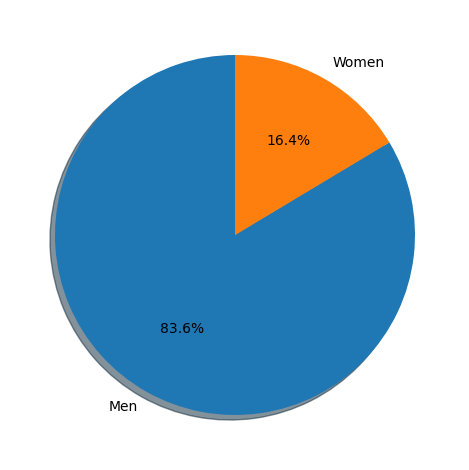

In [5]:
labels = pie.index
sizes = pie.Sex

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
fig.tight_layout()
plt.show()

In [6]:
years = range(2014,2024)
starting_year = 1955
#We start collecting data from 1955

In [7]:
for year in years:
    if year == years[0]:
        papers_to_sum = []
        citations_to_sum = []
        for yy in range(starting_year,years[0]):
            toadd = f'papers_{yy}'
            if toadd in data.columns:
                papers_to_sum.append(f'papers_{yy}')
                citations_to_sum.append(f'citations_{yy}')

    else:
        papers_to_sum.append(f'papers_{year}')
        citations_to_sum.append(f'citations_{year}')

    data[f'PapersTo{year}'] = data[papers_to_sum].sum(axis=1)
    data[f'CitationsTo{year}'] = data[citations_to_sum].sum(axis=1)
    

In [8]:
data

,ID,Sex,papers_1995,papers_1996,papers_1997,papers_1998,papers_1999,papers_2000,papers_2001,papers_2002,...,PapersTo2019,CitationsTo2019,PapersTo2020,CitationsTo2020,PapersTo2021,CitationsTo2021,PapersTo2022,CitationsTo2022,PapersTo2023,CitationsTo2023
0,0,male,1.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,...,133.0,3498.0,138.0,3524.0,143.0,3541.0,147.0,3546.0,150.0,3546.0
1,1,male,1.0,2.0,1.0,5.0,1.0,1.0,2.0,2.0,...,127.0,1901.0,134.0,1963.0,149.0,2037.0,154.0,2038.0,155.0,2039.0
2,2,male,4.0,2.0,5.0,2.0,7.0,11.0,4.0,17.0,...,234.0,9464.0,235.0,9470.0,237.0,9475.0,238.0,9475.0,282.0,9519.0
3,3,male,3.0,6.0,4.0,7.0,6.0,4.0,5.0,4.0,...,294.0,7431.0,299.0,7477.0,300.0,7479.0,301.0,7489.0,302.0,7489.0
4,4,male,10.0,5.0,16.0,9.0,12.0,23.0,12.0,1.0,...,292.0,5788.0,295.0,5794.0,297.0,5827.0,298.0,5827.0,299.0,5827.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,3660,male,9.0,8.0,2.0,2.0,2.0,1.0,2.0,2.0,...,272.0,6341.0,286.0,6538.0,292.0,6541.0,303.0,6551.0,311.0,6553.0
3661,3661,female,1.0,1.0,2.0,1.0,3.0,2.0,3.0,6.0,...,104.0,3148.0,105.0,3167.0,110.0,3206.0,116.0,3223.0,119.0,3223.0
3662,3662,male,2.0,1.0,3.0,5.0,2.0,3.0,2.0,1.0,...,144.0,2529.0,155.0,2589.0,173.0,2683.0,174.0,2694.0,187.0,2699.0
3663,3663,male,31.0,30.0,34.0,36.0,31.0,36.0,3.0,10.0,...,432.0,15482.0,440.0,15597.0,446.0,15617.0,454.0,15628.0,466.0,15631.0


## Media pubblicazioni anno per anno (generale + best quartile)

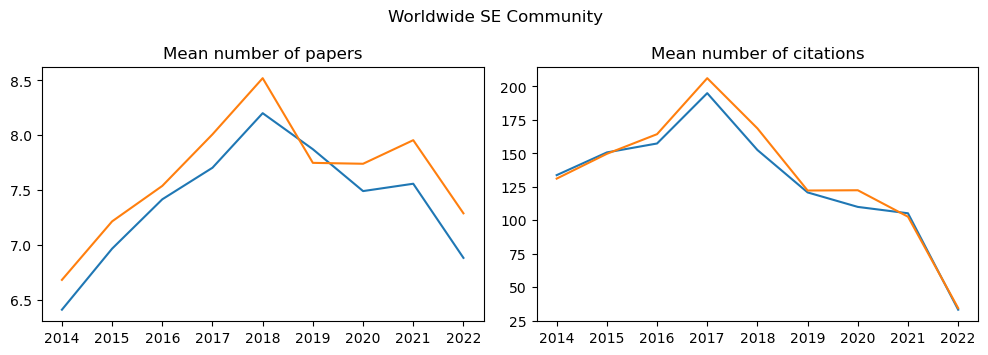

In [9]:
if prefix == 'all':
    fig, ( (ax_one,ax_two)) = plt.subplots(nrows=1,ncols=2)
    axes= [ax_one,ax_two]

    fig.set_size_inches(10,4)

    men = data.loc[data.Sex == 'male']
    women = data.loc[data.Sex == 'female']
    dfs = {'Men':men,'Women':women}
    ticks = {}
    tlabels = {}

    years = range(2014,2023)
    for i in range(0,2):
        ax = axes[i]
        if i == 0:
            ax.set_title("Mean number of papers")
        else:
            ax.set_title("Mean number of citations")
        for dfkey,dfvalue in dfs.items():
            resy = {}
            for year in years:
                if i == 0:
                    resy[year] =  dfvalue[f'papers_{year}'].mean()
                else:
                    resy[year] =  dfvalue[f'citations_{year}'].mean()

            ax.plot(resy.keys(),resy.values(),label=dfkey)

            ticks[i] = list(ax.get_yticks())
            tlabels[i] = list(ax.get_yticklabels())



    handles, labels = axes[1].get_legend_handles_labels()
    #fig.legend(handles, labels, loc='lower center', ncol = 2)
    fig.suptitle("Worldwide SE Community")
    fig.tight_layout()
    plt.subplots_adjust(bottom=0.2)



    plt.show()

In [10]:
men_bestq = {}
women_bestq = {}
for y in years:
    men_bestq[y] = men.loc[men[f'PapersTo{y}'] >= men[f'PapersTo{y}'].quantile(0.75)]
    women_bestq[y] = women.loc[women[f'PapersTo{y}'] >= women[f'PapersTo{y}'].quantile(0.75)]

In [11]:
men_bestq_papers = {}
men_bestq_cites = {}
women_bestq_papers = {}
women_bestq_cites = {}
for y in years:
    men_bestq_papers[y] = men_bestq[y][f'papers_{y}'].mean()
    men_bestq_cites[y] = men_bestq[y][f'citations_{y}'].mean()
    women_bestq_papers[y] = women_bestq[y][f'papers_{y}'].mean()
    women_bestq_cites[y] = women_bestq[y][f'citations_{y}'].mean()

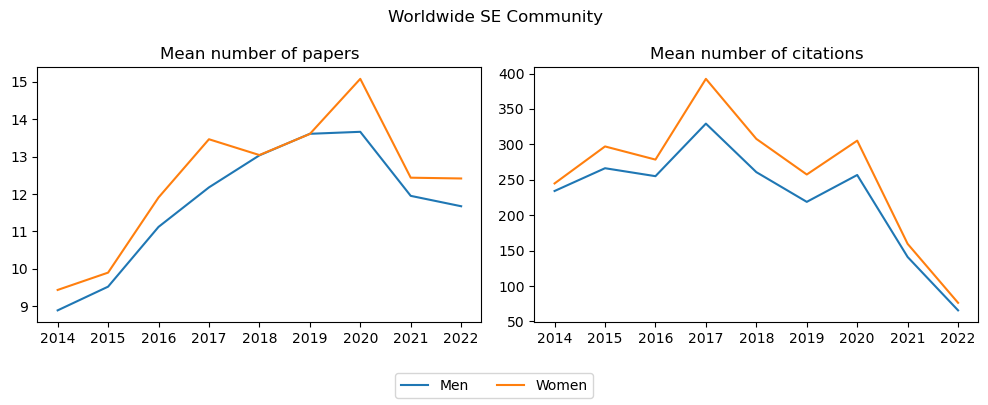

In [12]:
fig, ( (ax_one,ax_two)) = plt.subplots(nrows=1,ncols=2)
axes= [ax_one,ax_two]

fig.set_size_inches(10,4)

axes[0].plot(men_bestq_papers.keys(),men_bestq_papers.values(), label = 'Men')
axes[0].plot(women_bestq_papers.keys(),women_bestq_papers.values(), label = 'Women')
axes[0].set_title("Mean number of papers")
    


axes[1].plot(men_bestq_cites.keys(),men_bestq_cites.values(),label='Men')
axes[1].plot(women_bestq_cites.keys(),women_bestq_cites.values(),label='Women')
axes[1].set_title("Mean number of citations")


fig.suptitle("Worldwide SE Community")
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 2)
fig.tight_layout()
plt.subplots_adjust(bottom=0.2)